In [1]:
import json
import pandas as pd
import numpy as np
import re

In [2]:
file_dir = "data/"
with open(f'{file_dir}wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)
kaggle_metadata = pd.read_csv(f'{file_dir}movies_metadata.csv')
ratings = pd.read_csv('data/ratings.csv')

C:\Users\tabit\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(wiki_movies_raw)

7311

In [4]:
# first 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [5]:
# last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [6]:
#some records in the middle
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [7]:
kaggle_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [8]:
kaggle_metadata.tail()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0


In [9]:
kaggle_metadata.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
43891,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,94532,tt1866230,en,Reel Love,"A successful, big city girl returns to her sma...",...,2011-11-13,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Reel Love,False,5.1,5.0
39460,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,41298,tt0076532,es,El patrullero 777,Follows Diogenes as he goes about his day as a...,...,1978-04-27,0.0,120.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,El patrullero 777,False,7.0,2.0
42298,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,382212,tt5450084,de,Homo Sapiens,The images could be taken from a science ficti...,...,2016-07-29,0.0,94.0,[],Released,NaN,Homo Sapiens,False,7.3,6.0
23163,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,191294,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,...,2013-03-28,180590.0,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,False,6.9,62.0
33986,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 36, '...",NaN,56623,tt1526578,fr,"Ao, le dernier néandertal","When his clan, including his wife and baby gir...",...,2010-01-29,0.0,84.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Ao: The Last Hunter,False,6.5,16.0


In [10]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [11]:
ratings.tail()

,userId,movieId,rating,timestamp
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990
26024288,270896,71878,2.0,1257031858


In [12]:
ratings.sample(n=5)

,userId,movieId,rating,timestamp
17050550,177079,1090,5.0,970265529
3691200,38461,7285,3.5,1094134399
15584135,162256,68954,4.0,1499091044
731095,7437,2160,4.0,1224730325
9494042,98011,4958,3.0,1202276588


In [13]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [14]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [15]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)

In [16]:
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
wiki_movies_df.tail()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
7306,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018.0,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7307,https://en.wikipedia.org/wiki/Vice_(2018_film),2018.0,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7308,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018.0,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7309,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018.0,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7310,https://en.wikipedia.org/wiki/Black_Mirror:_Ba...,2018.0,https://www.imdb.com/title/tt9495224/,Bandersnatch,David Slade,Russell McLean,NaN,NaN,NaN,"[Fionn Whitehead, Will Poulter, Craig Parkinso...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
wiki_movies_df.sample(n=5)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
4544,https://en.wikipedia.org/wiki/Dan_in_Real_Life,2007.0,https://www.imdb.com/title/tt0480242/,Dan in Real Life,Peter Hedges,Jonathan Shestack,NaN,NaN,NaN,"[Steve Carell, Alison Pill, Juliette Binoche, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3846,https://en.wikipedia.org/wiki/The_Brothers_Gri...,2005.0,https://www.imdb.com/title/tt0355295/,The Brothers Grimm,Terry Gilliam,"[Charles Roven, Daniel Bobker]",NaN,NaN,NaN,"[Matt Damon, Heath Ledger, Peter Stormare, Len...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2964,https://en.wikipedia.org/wiki/Elvira%27s_Haunt...,2001.0,https://www.imdb.com/title/tt0265171/,Elvira's Haunted Hills,Sam Irvin,Mark Pierson,NaN,NaN,NaN,"[Elvira, Richard O'Brien, Mary Scheer, Scott A...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
640,"https://en.wikipedia.org/wiki/Silent_Night,_De...",1992.0,https://www.imdb.com/title/tt0105410/,"Silent Night, Deadly Night 5: The Toy Maker",Martin Kitrosser,"[Richard N. Gladstein, Brian Yuzna]",NaN,NaN,NaN,"[William Thorne, Mickey Rooney, Jane Higginson...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [20]:
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                   and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [21]:
wiki_movies_df = pd.DataFrame(wiki_movies)

In [22]:
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
def clean_movie(movie):
    movie = dict(movie)
    return movie

In [24]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6834,https://en.wikipedia.org/wiki/The_Insult_(film),2018,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,Case No. 23,NaN,NaN,NaN,قضية رقم ٢٣,Qadiyya raqm 23,NaN,NaN,NaN
7058,https://en.wikipedia.org/wiki/Capernaum_(film),2018,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,کفرناحوم‎,NaN,NaN,NaN,NaN


In [25]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

6834    https://en.wikipedia.org/wiki/The_Insult_(film)
7058     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [26]:
wiki_movies_df[wiki_movies_df['Japanese'].notnull()]['url']

6393    https://en.wikipedia.org/wiki/When_Marnie_Was_...
6829    https://en.wikipedia.org/wiki/Mary_and_the_Wit...
7009    https://en.wikipedia.org/wiki/My_Hero_Academia...
7054            https://en.wikipedia.org/wiki/Shoplifters
Name: url, dtype: object

In [27]:
wiki_movies_df[wiki_movies_df['Language'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7072,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7073,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7074,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
wiki_movies_df[wiki_movies_df['Hangul'].notnull()]['url']

3413    https://en.wikipedia.org/wiki/Wonderful_Days_(...
4238             https://en.wikipedia.org/wiki/Shark_Bait
Name: url, dtype: object

In [29]:
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Also known as',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Label',
 'Language',
 'Length',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russian',
 'Screen story by',
 'Screenplay by',
 'Simplifie

In [30]:
wiki_movies_df[wiki_movies_df['Chinese'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6620,https://en.wikipedia.org/wiki/Rock_Dog,2017,https://www.imdb.com/title/tt2822672/,Rock Dog,Ash Brannon,"[Amber Wang, David B. Miller, Rob Feng, Joyce ...","[Ash Brannon, Kurt Voelker]","[Ash Brannon, Zheng Jun]","[Tibetan Rock Dog, by Zheng Jun]","[Luke Wilson, Eddie Izzard, J. K. Simmons, Lew...",...,NaN,NaN,NaN,摇滚藏獒,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
wiki_movies_df[wiki_movies_df['Also known as'].notnull()]['url']

1342    https://en.wikipedia.org/wiki/Night_Watch_(199...
Name: url, dtype: object

In [32]:
wiki_movies_df['Chinese'].to_list()[6620]

'摇滚藏獒'

In [33]:
# Make an empty dict to hold all of the alternative titles.
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    return movie

In [34]:
# Make an empty dict to hold all of the alternative titles.
# Loop through a list of all alternative title keys
# Check if the current key exists in the movie object. If so, remove the key-value pair and add to the alternative titles dict.
# After looping through every key, add the alternative titles dict to the movie object.
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
    return movie

In [35]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    # combine alternate titles into one list
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune-Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie

In [36]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies)

In [37]:
clean_movies

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Cinematography': 'Oliver Wood',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',
  'Box office': '$21.4 million',
  'Director': 'Renny Harlin',
  'Distributor': '20th Century Fox',
  'Editor(s)': 'Michael Tronick',
  'Composer(s)': ['Cliff Eidelman', 'Yello'],
  'Producer(s)': ['Steve Perry', 'Joel Silver'],
  'Production company(s)': 'Silver Pictures',
  'Writer(s)': ['David Arnott', 'James Cappe']},
 {'url': 'https://en.wikipedia.org

In [38]:
wiki_movies_df.sample(n=5)

,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,McCune–Reischauer
3264,https://en.wikipedia.org/wiki/Casa_de_los_Babys,2003,https://www.imdb.com/title/tt0303830/,Casa de los Babys,NaN,"[Marcia Gay Harden, Maggie Gyllenhaal, Daryl H...",NaN,Mauricio Rubinstein,"[September 5, 2003, (, 2003-09-05, ), (, Venic...",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4433,https://en.wikipedia.org/wiki/The_Hunting_Part...,2007,https://www.imdb.com/title/tt0455782/,The Hunting Party,NaN,"[Richard Gere, Terrence Howard, Jesse Eisenber...",NaN,David Tattersall,"[14 September 2007, (, 2007-09-14, )]",101 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2715,https://en.wikipedia.org/wiki/The_Replacements...,2000,https://www.imdb.com/title/tt0191397/,The Replacements,NaN,"[Keanu Reeves, Gene Hackman, Orlando Jones, Jo...",NaN,Tak Fujimoto,"August 11, 2000",118 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,"https://en.wikipedia.org/wiki/No_Retreat,_No_S...",1990,https://www.imdb.com/title/tt0100266/,"No Retreat, No Surrender 3: Blood Brothers",NaN,"[Loren Avedon, Keith Vitali, Joseph Campanella]",NaN,John Huneck,"[January 25, 1990, (, 1990-01-25, )]",101 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2524,https://en.wikipedia.org/wiki/Simply_Irresisti...,1999,https://www.imdb.com/title/tt0145893/,Simply Irresistible,NaN,"[Sarah Michelle Gellar, Sean Patrick Flanery, ...",NaN,Robert M. Stevens,"[February 5, 1999, (, 1999-02-05, )]",96 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
wiki_movies_df['Writer(s)'].to_list()

[['David Arnott', 'James Cappe'],
 ['James Foley', 'Robert Redlin'],
 ['John Eskow', 'Richard Rush'],
 'Woody Allen',
 'Paul Hogan',
 'Larry Cohen',
 nan,
 'David Geeves',
 'Terrence McNally',
 'S. Warren',
 'Fred Braughton',
 ['Don Jakoby', 'Al Williams'],
 'Barry Levinson',
 'Steven Zaillian',
 ['Robert Zemeckis', 'Bob Gale'],
 'David Koepp',
 'Frank Henenlotter',
 'Alan Alda',
 ['Louis Venosta', 'David Seltzer'],
 'Joe McGinniss',
 'Catherine Cyran',
 ['Kathryn Bigelow', 'Eric Red', '[1]'],
 'Michael Cristofer',
 ['Rick Fry', 'Woody Keith', 'Brian Yuzna'],
 'Dennis Shryack',
 'Ken Friedman',
 ['Bennett Tramer (Story & teleplay)', 'Rich Melcombe', '(Story)'],
 ['Stephen Tolkin', 'Lawrence Block'],
 ['Duane Poole', 'Tom Swale'],
 ['Rachel Kronstadt Mann', 'Ann Louise Bardach', 'Alex Cox', 'Tod Davies'],
 'George Englund',
 ['Clayton Frohman', 'E.F. Wallengren', 'Jason Brett'],
 'Michael Petryni',
 'Don Mancini',
 'James F. Collier',
 'N.D. Schreiner',
 'Sandra Weintraub',
 'Mark L. Le

In [40]:
# regex to define a search pattern and then .drop_duplicates() to drop duplicates
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,McCune–Reischauer,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [41]:
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['McCune–Reischauer', 7031],
 ['imdb_id', 0]]

In [42]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

In [43]:
wiki_movies_df.count()

url                      7033
year                     7033
imdb_link                7033
title                    7032
Based on                 2181
Starring                 6849
Cinematography           6342
Release date             7001
Running time             6894
Country                  6797
Language                 6789
Budget                   4738
Box office               5485
Director                 7033
Distributor              6676
Editor(s)                6485
Composer(s)              6515
Producer(s)              6831
Production company(s)    5355
Writer(s)                6834
imdb_id                  7033
dtype: int64

In [44]:
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [45]:
box_office = wiki_movies_df['Box office'].dropna()

In [46]:
box_office.count

<bound method Series.count of 0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object>

In [47]:
def is_not_a_string(x):
    return type(x) != str
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [48]:
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [49]:
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [50]:
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [51]:
form_one = r'\$\d+\.?\d*\s*[mb]illion'
box_office.str.contains(form_one, flags=re.IGNORECASE).sum()

3896

In [52]:
form_two = r'\$\d{1,3}(?:,\d{3})+'
box_office.str.contains(form_two, flags=re.IGNORECASE).sum()

1544

In [56]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE)

In [57]:
box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [62]:
#fix values that have spaces between dollar sign and the number and that use a period as a thousands seperator
# fix million is sometimes misspelled
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

In [63]:
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [64]:
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [65]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [66]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [68]:
wiki_movies_df.sample(n=10)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office
4007,https://en.wikipedia.org/wiki/The_Darwin_Award...,2006,https://www.imdb.com/title/tt0428446/,The Darwin Awards,NaN,"[Joseph Fiennes, Winona Ryder, David Arquette,...",Hiro Narita,"[January 25, 2006, (, 2006-01-25, ), (, Sundan...",94 minutes,United States,...,NaN,Finn Taylor,"[Metro-Goldwyn-Mayer, Icon Entertainment]",Rick LeCompte,David Kitay,"[Jason Blum, Debbie Brubaker, Dieter Busch, Fr...","[Blumhouse Productions, WOW Films, Tavistock P...",Finn Taylor,tt0428446,NaN
1818,https://en.wikipedia.org/wiki/The_Best_Bad_Thing,1997,https://www.imdb.com/title/tt0156022/,The Best Bad Thing,NaN,NaN,NaN,"[1997, (, 1997, )]",NaN,Canada,...,NaN,Peter Rowe,CiNAR,NaN,Jimmy Tanaka,NaN,NaN,David Preston,tt0156022,NaN
273,https://en.wikipedia.org/wiki/Bingo_(1991_film),1991,https://www.imdb.com/title/tt0101455/,Bingo,NaN,"[Cindy Williams, David Rasche, Robert J. Stein...",John McPherson,"[August 9, 1991, (, 1991-08-09, )]",89 minutes,United States,...,"$8,667,684",Matthew Robbins,TriStar Pictures,Maryann Brandon,Richard Gibbs,Thomas Baer,"[TriStar Pictures, Thomas Baer Productions]",Jim Strain,tt0101455,8667684.0
6619,https://en.wikipedia.org/wiki/Get_Out,2017,https://www.imdb.com/title/tt5052448/,Get Out,NaN,"[Daniel Kaluuya, Allison Williams, Bradley Whi...",Toby Oliver,"[January 23, 2017, (, 2017-01-23, ), (, Sundan...",104 minutes,United States,...,$255.4 million,Jordan Peele,Universal Pictures,Gregory Plotkin,Michael Abels,"[Sean McKittrick, Jason Blum, Edward H. Hamm J...","[Blumhouse Productions, QC Entertainment, Monk...",Jordan Peele,tt5052448,255400000.0
2252,https://en.wikipedia.org/wiki/My_Giant,1998,https://www.imdb.com/title/tt0120765/,My Giant,NaN,"[Billy Crystal, Kathleen Quinlan, Joanna Pacuł...",Michael Coulter,"[April 10, 1998, (US), February 12, 1999, (UK)]",103 minutes,United States,...,"$8,072,007",Michael Lehmann,Columbia Pictures,Stephen Semel,Marc Shaiman,Billy Crystal,Castle Rock Entertainment,"[Billy Crystal, David Seltzer]",tt0120765,8072007.0
2619,https://en.wikipedia.org/wiki/Dinosaur_(film),2000,https://www.imdb.com/title/tt0130623/,Dinosaur,NaN,"[D. B. Sweeney, Alfre Woodard, Ossie Davis, Ma...","[David Hardberger, S. Douglas Smith]","[May 19, 2000, (, 2000-05-19, ), (United States)]",82 minutes,United States,...,$349.8 million,"[Ralph Zondag, Eric Leighton]",Buena Vista Pictures,H. Lee Peterson,James Newton Howard,Pam Marsden,"[Walt Disney Pictures, Walt Disney Feature Ani...","[John Harrison, Robert Nelson Jacobs, Thom Enr...",tt0130623,349800000.0
3287,https://en.wikipedia.org/wiki/Le_Divorce,2003,https://www.imdb.com/title/tt0306734/,Le Divorce,"[Le Divorce, by, Diane Johnson]","[Kate Hudson, Naomi Watts, Glenn Close, Leslie...",Pierre Lhomme,"[August 8, 2003, (, 2003-08-08, )]",117 minutes,United States,...,$13 million,James Ivory,Fox Searchlight Pictures,John David Allen,Richard Robbins,"[Ismail Merchant, Michael Schiffer]",Merchant Ivory Productions,"[Ruth Prawer Jhabvala, James Ivory]",tt0306734,13000000.0
4672,https://en.wikipedia.org/wiki/Harold_(film),2008,https://www.imdb.com/title/tt1041753/,Harold,NaN,"[Spencer Breslin, Cuba Gooding Jr., Nikki Blon...",Christopher LaVasseur,"[July 11, 2008, (, 2008-07-11, )]",105 minutes,United States,...,"$13,229",T. Sean Shannon,City Lights Pictures,Colleen Sharp,NaN,"[Cuba Gooding Jr., Morris S. Levy]","[Blue Star Pictures, City Lights Pictures, M.E...","[Greg Fields, T. Sean Shannon]",tt1041753,13229.0
1285,https://en.wikipedia.org/wiki/The_Jerky_Boys:_...,1995,https://www.imdb.com/title/tt0110189/,The Jerky Boys: The Movie,NaN,"[Johnny Brennan, Kamal Ahmed, Alan Arkin]",Ueli Steiger,"[February 3, 1995, (, 1995-02-03, ), (U.S.)]",81 minutes,United States,...,$7.6 million,James Melkonian,Buena Vista Pictures,Dennis M. Hill,Ira Newborn,"[Roger B

In [69]:
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [70]:
wiki_movies_df.sample(n=10)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office
850,https://en.wikipedia.org/wiki/Undercover_Blues,1993,https://www.imdb.com/title/tt0108442/,Undercover Blues,NaN,"[Kathleen Turner, Dennis Quaid, Fiona Shaw, St...",Donald E. Thorin,"[September 10, 1993, (, 1993-09-10, )]",89 minutes,United States,...,$25 million,Herbert Ross,Metro Goldwyn Mayer,Priscilla Nedd-Friendly,David Newman,Mike Lobell,NaN,Ian Abrams,tt0108442,12324660.0
2102,https://en.wikipedia.org/wiki/Velocity_Trap,1997,https://www.imdb.com/title/tt0120435/,Velocity Trap,NaN,"[Olivier Gruner, Alicia Coppola, Ken Olandt]",Philip D. Schwartz,NaN,89 minutes,United States,...,NaN,Phillip J. Roth,New City Releasing,Christian McIntire,"[Jim Goodwin, Richard McHugh, Mike Slamer]","[Christian McIntire, Ken Olandt, Phillip J. Ro...",NaN,"[Patrick Phillips, Phillip J. Roth]",tt0120435,NaN
5128,https://en.wikipedia.org/wiki/The_Kids_Are_All...,2010,https://www.imdb.com/title/tt0842926/,The Kids Are All Right,NaN,"[Annette Bening, Julianne Moore, Mark Ruffalo,...",Igor Jadue-Lillo,"[January 25, 2010, (, 2010-01-25, ), (Sundance...",107 minutes,United States,...,$4 million,Lisa Cholodenko,Focus Features,Jeffrey M. Werner,Carter Burwell,"[Gary Gilbert, Jeffrey Levy-Hinte, Celine Ratt...","[Gilbert Films, Saint Aire Productions, Artist...","[Lisa Cholodenko, Stuart Blumberg]",tt0842926,34700000.0
1413,https://en.wikipedia.org/wiki/Tom_and_Huck,1995,https://www.imdb.com/title/tt0112302/,Tom and Huck,NaN,"[Jonathan Taylor Thomas, Brad Renfro]",Bobby Bukowski,"[December 22, 1995, (, 1995-12-22, )]",92 minutes,United States,...,NaN,Peter Hewitt,Buena Vista Pictures,David Freeman,Stephen Endelman,"[Laurence Mark, Stephen Sommers]",Walt Disney Pictures,"[The Adventures of Tom Sawyer, by, Mark Twain]",tt0112302,23900000.0
4472,https://en.wikipedia.org/wiki/Martian_Child,2007,https://www.imdb.com/title/tt0415965/,Martian Child,"[The Martian Child, by David Gerrold]","[John Cusack, Bobby Coleman, Amanda Peet, Soph...",Robert D. Yeoman,"[November 2, 2007, (, 2007-11-02, )]",106 minutes,United States,...,$27 million,Menno Meyjes,New Line Cinema,Bruce Green,Aaron Zigman,"[Ed Elbert, Drew Barrymore, David Kirschner, T...","[Flower Films, MERADIN Zweite Productions]",Seth E. Bass & Jonathan Tolins,tt0415965,9400000.0
5435,https://en.wikipedia.org/wiki/2-Headed_Shark_A...,2012,https://www.imdb.com/title/tt2043757/,2-Headed Shark Attack,NaN,"[Carmen Electra, Charlie O'Connell, Brooke Hogan]",Stuart Brereton,"[January 31, 2012, (, 2012-01-31, )]",88 minutes,United States,...,$1 million,Christopher Ray,The Asylum,Rob Pallatina,Chris Ridenhour,David Michael Latt,NaN,"[Edward DeRuiter, H. Perry Horton]",tt2043757,NaN
1090,https://en.wikipedia.org/wiki/The_Shadow_(1994...,1994,https://www.imdb.com/title/tt0111143/,The Shadow,"[The Shadow, by, Walter B. Gibson]","[Alec Baldwin, John Lone, Penelope Ann Miller,...",Stephen H. Burum,"[July 1, 1994, (, 1994-07-01, )]",108 minutes,United States,...,$40 million,Russell Mulcahy,Universal Pictures,"[Peter Honess, Beth Jochem Besterveld]",Jerry Goldsmith,"[Martin Bregman, Willi Baer, Michael S. Bregman]","Bregman/Baer Productions, inc.",David Koepp,tt0111143,48000000.0
6503,https://en.wikipedia.org/wiki/Keanu_(film),2016,https://www.imdb.com/title/tt4139124/,Keanu,NaN,"[Jordan Peele, Keegan-Michael Key, Tiffany Had...",Jas Shelton,"[March 13, 2016, (, 2016-03-13, ), (, SXSW, ),...",100 minutes,United States,...,$15 million,Peter Atencio,Warner Bros. Pictures,Nicholas Monsour,"[Steve Jablonsky, Nathan Whitehead]","[Jordan Peele, Keegan-Michael Key, Peter Princ...","[New Line Cinema, RatPac-Dune Entertainment, M...","[Jordan Peele, Alex Rubens]",tt4139124,20600000.0
1389,https://en.wikipedia.org/wiki/Slave_of_Dreams,1995,https://www.imdb.com/title/tt0114470/,Slave of Dreams,NaN,"[Edward James Olmos, Sher

In [71]:
budget = wiki_movies_df['Budget'].dropna()

In [72]:
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [73]:
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [74]:
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [75]:
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [76]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [77]:
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [79]:
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [81]:
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,2018
7074,"August 31, 2018"


In [82]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

In [83]:
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE).sum()

6528

In [85]:
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [86]:
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE).sum()

6877

In [87]:
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [88]:
running_time[running_time.str.contains(r'\d*\s*m', flags=re.IGNORECASE) != True]

1347    25 : 03
1551     varies
3925    4 hours
Name: Running time, dtype: object

In [89]:
running_time.str.contains(r'\d*\s*m', flags=re.IGNORECASE).sum()

6891

In [90]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [91]:
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [92]:
wiki_movies_df.sample(n=5)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Country,Language,...,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office,budget,release_date,running_time
5715,https://en.wikipedia.org/wiki/The_Unspeakable_Act,2012,https://www.imdb.com/title/tt2023765/,The Unspeakable Act,NaN,"[Tallie Medel, Sky Hirschkron, Aundrea Fares, ...",Duraid Munajim,"[April 19, 2012, (, 2012-04-19, ), (, Sarasota...",United States,English,...,Dan Sallitt,NaN,"[Shari Berman, Jaime Christley, Mark J. Parker...",Static Prods.,Dan Sallitt,tt2023765,NaN,NaN,2012-04-19,91.0
5290,https://en.wikipedia.org/wiki/Dylan_Dog:_Dead_...,2011,https://www.imdb.com/title/tt1013860/,Dylan Dog: Dead of Night,"[Dylan Dog, by, Tiziano Sclavi]","[Brandon Routh, Sam Huntington, Anita Briem, P...",Geoffrey Hall,"[March 16, 2011, (, 2011-03-16, ), (Italy), Ap...",United States,"[English, Italian]",...,Paul Hirsch,Klaus Badelt,"[Gilbert Adler, Scott Mitchell Rosenberg]","[Hyde Park Entertainment, Long Distance Films,...",Thomas Dean Donnelly and Joshua Oppenheimer,tt1013860,4634062.0,20000000.0,2011-03-16,108.0
1931,https://en.wikipedia.org/wiki/I_Married_a_Stra...,1997,https://www.imdb.com/title/tt0119346/,I Married a Strange Person!,NaN,"[Charis Michelsen, Tom Larson, Richard Spore]",John Donnelly,"[September 8, 1997, (, 1997-09-08, ), (, TIFF,...",United States,English language,...,Anthony Arcidi,Maureen McElheron,Bill Plympton,Italtoons,"[Bill Plympton, P.C. Vey]",tt0119346,467272.0,250000.0,1997-01-01,73.0
3215,https://en.wikipedia.org/wiki/Waking_Up_in_Reno,2002,https://www.imdb.com/title/tt0219400/,Waking Up in Reno,NaN,"[Natasha Richardson, Billy Bob Thornton, Patri...",William A. Fraker,"[October 25, 2002, (, 2002-10-25, )]",United States,English,...,Lisa Zeno Churgin,"[Christopher Young, Marty Stuart]","[Ben Myron, Robert Salerno, Dwight Yoakam]",NaN,"[Brent Briscoe, Mark Fauser]",tt0219400,267109.0,NaN,2002-10-25,91.0
4814,https://en.wikipedia.org/wiki/Alvin_and_the_Ch...,2009,https://www.imdb.com/title/tt1231580/,Alvin and the Chipmunks:The Squeakquel,"[Alvin and the Chipmunks, by, Ross Bagdasarian...","[Justin Long, Matthew Gray Gubler, Jesse McCar...",Anthony B. Richmond,"[December 23, 2009, (, 2009-12-23, )]",United States,English,...,Matthew Friedman,David Newman,"[Janice Karman, Ross Bagdasarian]","[Fox 2000 Pictures, Regency Enterprises, Bagda...","[Jon Vitti, Jonathan Aibel, Glenn Berger]",tt1231580,443100000.0,70000000.0,2009-12-23,88.0


In [94]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [95]:
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [96]:
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [98]:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [99]:
kaggle_metadata['video'] == 'True'
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [100]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [101]:
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [102]:
kaggle_metadata.dtypes

belongs_to_collection            object
budget                            int32
genres                           object
homepage                         object
id                                int64
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
video                              bool
vote_average                    float64
vote_count                      float64
dtype: object

In [103]:
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [104]:
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [105]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count    2.602429e+07
mean     3.528090e+00
std      1.065443e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

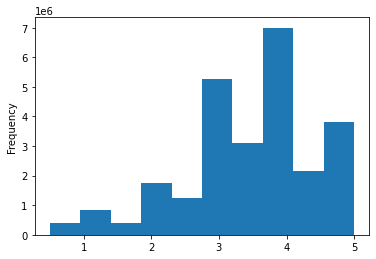

In [106]:
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

In [112]:
wiki_movies_df.columns

Index(['url', 'year', 'imdb_link', 'title', 'Based on', 'Starring',
       'Cinematography', 'Release date', 'Country', 'Language', 'Director',
       'Distributor', 'Editor(s)', 'Composer(s)', 'Producer(s)',
       'Production company(s)', 'Writer(s)', 'imdb_id', 'box_office', 'budget',
       'release_date', 'running_time'],
      dtype='object')

In [115]:
kaggle_metadata.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [116]:
movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])
print(movies_df.columns)

Index(['url', 'year', 'imdb_link', 'title_wiki', 'Based on', 'Starring',
       'Cinematography', 'Release date', 'Country', 'Language', 'Director',
       'Distributor', 'Editor(s)', 'Composer(s)', 'Producer(s)',
       'Production company(s)', 'Writer(s)', 'imdb_id', 'box_office',
       'budget_wiki', 'release_date_wiki', 'running_time',
       'belongs_to_collection', 'budget_kaggle', 'genres', 'homepage', 'id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date_kaggle', 'revenue', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title_kaggle', 'video', 'vote_average',
       'vote_count'],
      dtype='object')


In [117]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle
# running_time             runtime
# budget_wiki              budget_kaggle
# box_office               revenue
# release_date_wiki        release_date_kaggle
# Language                 original_language
# Production company(s)    production_companies

In [118]:
movies_df[['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
0,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane
1,"After Dark, My Sweet","After Dark, My Sweet"
2,Air America,Air America
3,Alice,Alice
4,Almost an Angel,Almost an Angel
...,...,...
6047,A Fantastic Woman,A Fantastic Woman
6048,Permission,Permission
6049,Loveless,Loveless
6050,Gemini,Gemini


In [125]:
#rows where titles don't match
movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,The Dark Side of the Moon,The Dark Side of The Moon
42,Delta Force 2,Delta Force 2: The Colombian Connection
48,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
...,...,...
5956,Chips,CHiPS
5971,Spark,Spark: A Space Tail
5994,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6023,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


In [126]:
# confirm no missing titles in Kaggle
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


In [127]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle             Drop title_wiki
# running_time             runtime
# budget_wiki              budget_kaggle
# box_office               revenue
# release_date_wiki        release_date_kaggle
# Language                 original_language
# Production company(s)    production_companies

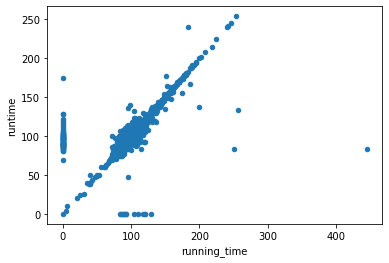

In [128]:
movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')

In [129]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle             Drop title_wiki
# running_time             runtime                  Keep runtime, fill in 0s with runtime
# budget_wiki              budget_kaggle
# box_office               revenue
# release_date_wiki        release_date_kaggle
# Language                 original_language
# Production company(s)    production_companies

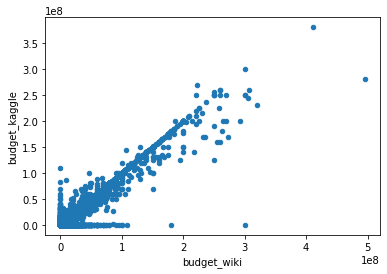

In [130]:
movies_df.fillna(0).plot(x='budget_wiki',y='budget_kaggle', kind='scatter')

In [131]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle             Drop title_wiki
# running_time             runtime                  Keep runtime, fill in 0s with runtime
# budget_wiki              budget_kaggle            Keep budget_kaggle, fill in 0s with budget_wiki
# box_office               revenue
# release_date_wiki        release_date_kaggle
# Language                 original_language
# Production company(s)    production_companies

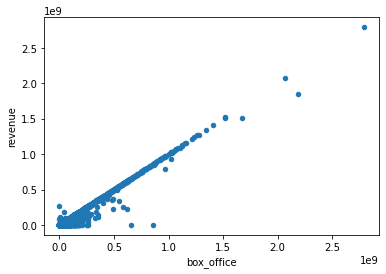

In [132]:
movies_df.fillna(0).plot(x='box_office', y='revenue', kind='scatter')

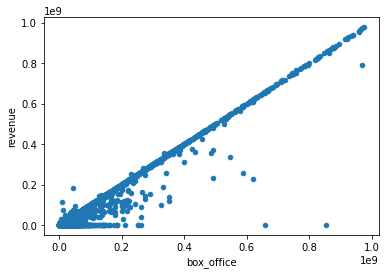

In [133]:
movies_df.fillna(0)[movies_df['box_office'] < 10**9].plot(x='box_office', y='revenue', kind='scatter')

In [134]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle             Drop title_wiki
# running_time             runtime                  Keep runtime, fill in 0s with runtime
# budget_wiki              budget_kaggle            Keep budget_kaggle, fill in 0s with budget_wiki
# box_office               revenue                  Keep revenue, fill in 0s with box_office
# release_date_wiki        release_date_kaggle
# Language                 original_language
# Production company(s)    production_companies

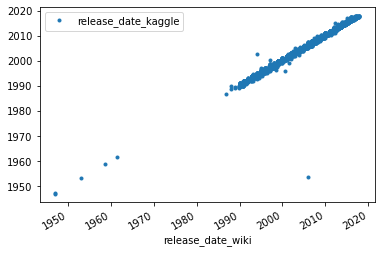

In [135]:
movies_df[['release_date_wiki','release_date_kaggle']].plot(x='release_date_wiki', y='release_date_kaggle', style='.')

In [136]:
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
3607,https://en.wikipedia.org/wiki/The_Holiday,2006,https://www.imdb.com/title/tt00457939/,The Holiday,NaN,"[Kate Winslet, Cameron Diaz, Jude Law, Jack Bl...",Dean Cundey,"[December 8, 2006, (, 2006-12-08, )]",United States,English,...,1953-08-28,30500000.0,118.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pouring out of impassioned pages...brawling th...,From Here to Eternity,False,7.2,137.0


In [137]:
movies_df = movies_df.drop(movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index)

In [138]:
movies_df[movies_df['release_date_wiki'].isnull()]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
1008,https://en.wikipedia.org/wiki/Black_Scorpion_(...,1995,https://www.imdb.com/title/tt0112519/,Black Scorpion,NaN,"[Joan Severance, Bruce Abbott, Garrett Morris]",Geoff George,NaN,United States,NaN,...,1995-08-22,0.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Justice has a nasty sting.,Black Scorpion,False,6.1,7.0
1061,https://en.wikipedia.org/wiki/Flirt_(1995_film),1995,https://www.imdb.com/title/tt0113080/,Flirt,NaN,"[Bill Sage, Dwight Ewell, Miho Nikaido]",Michael Spiller,NaN,"[United States, Germany, Japan, [1]]",NaN,...,1995-09-14,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Flirt,False,7.5,4.0
1121,https://en.wikipedia.org/wiki/Let_It_Be_Me_(19...,1995,https://www.imdb.com/title/tt0113638/,Let It Be Me,NaN,NaN,Miroslav Ondrícek,NaN,NaN,NaN,...,1995-11-17,0.0,95.0,[],Released,NaN,Let It Be Me,False,8.0,2.0
1564,https://en.wikipedia.org/wiki/A_Brooklyn_State...,1997,https://www.imdb.com/title/tt0118782/,A Brooklyn State of Mind,NaN,NaN,Ken Kelsch,NaN,NaN,NaN,...,1998-01-01,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,A Brooklyn State of Mind,False,5.0,1.0
1633,https://en.wikipedia.org/wiki/Highball_(film),1997,https://www.imdb.com/title/tt0119291/,Highball,NaN,"[Justine Bateman, Peter Bogdanovich, Chris Eig...",Steven Bernstein,NaN,United States,English,...,1997-01-01,0.0,110.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Highball,False,4.5,4.0
1775,https://en.wikipedia.org/wiki/Velocity_Trap,1997,https://www.imdb.com/title/tt0120435/,Velocity Trap,NaN,"[Olivier Gruner, Alicia Coppola, Ken Olandt]",Philip D. Schwartz,NaN,United States,NaN,...,1999-02-22,0.0,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Crime at the Speed of Light,Velocity Trap,False,4.7,6.0
2386,https://en.wikipedia.org/wiki/The_Visit_(2000_...,2000,https://www.imdb.com/title/tt0199129/,The Visit,NaN,"[Hill Harper, Billy Dee Williams, Obba Babatun...",John L. Demps Jr.,NaN,NaN,English,...,2000-01-01,0.0,107.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Rumored,NaN,The Visit,False,0.0,0.0
2786,https://en.wikipedia.org/wiki/Stevie_(2002_film),2002,https://www.imdb.com/title/tt0334416/,Stevie,NaN,NaN,"[Dana Kupper, Gordon Quinn, Peter Gilbert]",NaN,United States,English,...,2002-09-09,97000.0,140.0,[],NaN,NaN,Stevie,False,6.7,13.0
3174,https://en.wikipedia.org/wiki/Return_to_Sender...,2004,https://www.imdb.com/title/tt0396190/,Return to Sender,NaN,"[Aidan Quinn, Connie Nielsen, Mark Holton]",NaN,NaN,"[Denmark, USA, UK]",NaN,...,2004-09-17,0.0,109.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"How can you save someone, who won't save herself?",Return to Sender,False,5.9,13.0
3651,https://en.wikipedia.org/wiki/Live_Free_or_Die...,2006,https://www.imdb.com/title/tt0432318/,Live Free or Die,NaN,"[Aaron Stanford, Paul Schneider, Ebon Moss-Bac...",NaN,NaN,United States,English,...,2006-03-11,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Live Free or Die,False,5.5,8.0


In [139]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle             Drop title_wiki
# running_time             runtime                  Keep runtime, fill in 0s with runtime
# budget_wiki              budget_kaggle            Keep budget_kaggle, fill in 0s with budget_wiki
# box_office               revenue                  Keep revenue, fill in 0s with box_office
# release_date_wiki        release_date_kaggle      Drop release_date_wiki
# Language                 original_language
# Production company(s)    production_companies

In [140]:
movies_df['Language'].apply(lambda x: tuple(x) if type(x) == list else x).value_counts(dropna=False)

English                                       5479
NaN                                            134
(English, Spanish)                              68
(English, French)                               35
(English, Japanese)                             25
                                              ... 
(English, French, Arabic)                        1
(English, French, Kinyarwanda)                   1
(English, Scottish Gaelic)                       1
(English, German, Italian)                       1
(English, Mandarin Chinese, Thai, Russian)       1
Name: Language, Length: 198, dtype: int64

In [141]:
movies_df['original_language'].value_counts(dropna=False)

en    5987
fr      16
es      10
it       8
de       6
zh       4
pt       4
ja       4
hi       2
da       2
ab       1
ar       1
cn       1
he       1
sv       1
ru       1
tr       1
ko       1
Name: original_language, dtype: int64

In [142]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle             Drop title_wiki
# running_time             runtime                  Keep runtime, fill in 0s with runtime
# budget_wiki              budget_kaggle            Keep budget_kaggle, fill in 0s with budget_wiki
# box_office               revenue                  Keep revenue, fill in 0s with box_office
# release_date_wiki        release_date_kaggle      Drop release_date_wiki
# Language                 original_language        Drop Language
# Production company(s)    production_companies

In [143]:
movies_df[['Production company(s)','production_companies']]

,Production company(s),production_companies
0,Silver Pictures,[{'name': 'Twentieth Century Fox Film Corporat...
1,Avenue Pictures,"[{'name': 'Avenue Pictures Productions', 'id':..."
2,"[Carolco Pictures, IndieProd Company]","[{'name': 'IndieProd Company Productions', 'id..."
3,NaN,"[{'name': 'Orion Pictures', 'id': 41}]"
4,NaN,"[{'name': 'Paramount Pictures', 'id': 4}]"
...,...,...
6047,"[Fabula, Komplizen Film]","[{'name': 'Komplizen Film', 'id': 1618}, {'nam..."
6048,Ball & Chain Productions,"[{'name': 'Ball & Chain Productions', 'id': 74..."
6049,"[Arte France Cinéma, Why Not Productions]","[{'name': 'ARTE France Cinéma', 'id': 94}, {'n..."
6050,"[Film Science, Rough House Pictures, Syncopate...","[{'name': 'Film Science', 'id': 1976}, {'name'..."


In [144]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle             Drop title_wiki
# running_time             runtime                  Keep runtime, fill in 0s with runtime
# budget_wiki              budget_kaggle            Keep budget_kaggle, fill in 0s with budget_wiki
# box_office               revenue                  Keep revenue, fill in 0s with box_office
# release_date_wiki        release_date_kaggle      Drop release_date_wiki
# Language                 original_language        Drop Language
# Production company(s)    production_companies     Drop Production Company(s)

In [145]:
# drop the title_wiki, release_date_wiki, Language, and Production company(s) columns.
movies_df.drop(columns=['title_wiki','release_date_wiki','Language','Production company(s)'], inplace=True)

In [146]:
#make a function that fills in missing data for a column pair and then drops the redundant column.
def fill_missing_kaggle_data(df, kaggle_column, wiki_column):
    df[kaggle_column] = df.apply(
        lambda row: row[wiki_column] if row[kaggle_column] == 0 else row[kaggle_column]
        , axis=1)
    df.drop(columns=wiki_column, inplace=True)

In [147]:
fill_missing_kaggle_data(movies_df, 'runtime', 'running_time')
fill_missing_kaggle_data(movies_df, 'budget_kaggle', 'budget_wiki')
fill_missing_kaggle_data(movies_df, 'revenue', 'box_office')
movies_df

,url,year,imdb_link,Based on,Starring,Cinematography,Release date,Country,Director,Distributor,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",United States,Renny Harlin,20th Century Fox,...,1990-07-11,20423389.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.2,72.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",United States,James Foley,Avenue Pictures,...,1990-08-24,2700000.0,114.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",False,6.5,17.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",United States,Roger Spottiswoode,TriStar Pictures,...,1990-08-10,33461269.0,112.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,False,5.3,146.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",United States,Woody Allen,Orion Pictures,...,1990-12-25,7331647.0,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,False,6.3,57.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",US,John Cornell,Paramount Pictures,...,1990-12-21,6939946.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,False,5.6,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,https://en.wikipedia.org/wiki/A_Fantastic_Woman,2018,https://www.imdb.com/title/tt5639354/,NaN,"[Daniela Vega, Francisco Reyes]",Benjamín Echazarreta,"[12 February 2017, (, 2017-02-12, ), (, Berlin...","[Chile, Germany, Spain, United States, [2]]",Sebastián Lelio,"[Participant Media (Chile), Piffl Medien (Germ...",...,2017-04-06,3700000.0,104.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,A Fantastic Woman,False,7.2,13.0
6048,https://en.wikipedia.org/wiki/Permission_(film),2018,https://www.imdb.com/title/tt5390066/,NaN,"[Rebecca Hall, Dan Stevens, Morgan Spector, Fr...",Adam Bricker,"[April 22, 2017, (, 2017-04-22, ), (, Tribeca ...",United States,Brian Crano,Good Deed Entertainment,...,2017-04-22,NaN,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Permission,False,0.0,1.0
6049,https://en.wikipedia.org/wiki/Loveless_(film),2018,https://www.imdb.com/title/tt6304162/,NaN,"[Maryana Spivak, Aleksey Rozin, Matvey Novikov...",Mikhail Krichman,"[18 May 2017, (, 2017-05-18, ), (, Cannes, ), ...","[Russia, France, Belgium, Germany, [3]]",Andrey Zvyagintsev,"[Sony Pictures Releasing, (Russia), [1]]",...,2017-06-01,4800000.0,128.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Loveless,False,7.8,26.0
6050,https://en.wikipedia.org/wiki/Gemini_(2017_film),2018,https://www.imdb.com/title/tt5795086/,NaN,"[Lola Kirke, Zoë Kravitz, Greta Lee, Michelle ...",Andrew Reed,"[March 12, 2017, (, 2017-03-12, ), (, SXSW, ),...",United States,Aaron Katz,Neon,...,2017-03-12,200340.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Gemini,False,0.0,0.0


In [148]:
for col in movies_df.columns:
    lists_to_tuples = lambda x: tuple(x) if type(x) == list else x
    value_counts = movies_df[col].apply(lists_to_tuples).value_counts(dropna=False)
    num_values = len(value_counts)
    if num_values == 1:
        print(col)

video


In [149]:
movies_df['video'].value_counts(dropna=False)

False    6051
Name: video, dtype: int64

In [150]:
# drop the title_wiki, release_date_wiki, Language, and Production company(s) columns.
movies_df.drop(columns=['video'], inplace=True)

In [151]:
movies_df = movies_df.loc[:, ['imdb_id','id','title_kaggle','original_title','tagline','belongs_to_collection','url','imdb_link',
                       'runtime','budget_kaggle','revenue','release_date_kaggle','popularity','vote_average','vote_count',
                       'genres','original_language','overview','spoken_languages','Country',
                       'production_companies','production_countries','Distributor',
                       'Producer(s)','Director','Starring','Cinematography','Editor(s)','Writer(s)','Composer(s)','Based on'
                      ]]

In [152]:
movies_df.rename({'id':'kaggle_id',
                  'title_kaggle':'title',
                  'url':'wikipedia_url',
                  'budget_kaggle':'budget',
                  'release_date_kaggle':'release_date',
                  'Country':'country',
                  'Distributor':'distributor',
                  'Producer(s)':'producers',
                  'Director':'director',
                  'Starring':'starring',
                  'Cinematography':'cinematography',
                  'Editor(s)':'editors',
                  'Writer(s)':'writers',
                  'Composer(s)':'composers',
                  'Based on':'based_on'
                 }, axis='columns', inplace=True)

In [153]:
movies_df.sample(n=10)

,imdb_id,kaggle_id,title,original_title,tagline,belongs_to_collection,wikipedia_url,imdb_link,runtime,budget,...,production_countries,distributor,producers,director,starring,cinematography,editors,writers,composers,based_on
1292,tt0112844,47449,Denise Calls Up,Denise Calls Up,"A hilarious heart-ringing fable about life, lo...",NaN,https://en.wikipedia.org/wiki/Denise_Calls_Up,https://www.imdb.com/title/tt0112844/,80.0,NaN,...,"[{'iso_3166_1': 'US', 'name': 'United States o...","[Davis Entertainment, Sony Pictures Classics]",J. Todd Harris,Hal Salwen,"[Tim Daly, Caroleen Feeney, Dan Gunther, Dana ...",NaN,NaN,Hal Salwen,NaN,NaN
5478,tt2223990,200505,Draft Day,Draft Day,The greatest victories don't always happen on ...,NaN,https://en.wikipedia.org/wiki/Draft_Day,https://www.imdb.com/title/tt2223990/,109.0,25000000.0,...,"[{'iso_3166_1': 'US', 'name': 'United States o...","[Summit Entertainment, Lionsgate]","[Ivan Reitman, Ali Bell, Joe Medjuck, Gigi Pri...",Ivan Reitman,"[Kevin Costner, Jennifer Garner, Denis Leary, ...",Eric Steelberg,"[Sheldon Kahn, Dana E. Glauberman]","[Rajiv Joseph, Scott Rothman]",John Debney,NaN
4751,tt1547230,60062,Judy Moody and the Not Bummer Summer,Judy Moody and the Not Bummer Summer,Supermegatotally thrilladelic,NaN,https://en.wikipedia.org/wiki/Judy_Moody_and_t...,https://www.imdb.com/title/tt1547230/,91.0,20000000.0,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",Relativity Media,"[Sara Siegel-Magness, Gary Magness, Bobbi Sue ...",John Schultz,"[Jordana Beatty, Heather Graham, Parris Mostel...",Shawn Maurer,John Pace III,"[Megan McDonald, Kathy Waugh]",Richard Gibbs,"[Judy Moody, by Megan McDonald]"
5460,tt3210686,235260,Son of God,Son of God,Their Empire. His Kingdom.,NaN,https://en.wikipedia.org/wiki/Son_of_God_(film),https://www.imdb.com/title/tt3210686/,138.0,22000000.0,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",20th Century Fox,"[Roma Downey, Mark Burnett]",Christopher Spencer,"[Diogo Morgado, Roma Downey]",Rob Goldie,Robert Hall,"[Richard Bedser, Christopher Spencer, Colin Sw...","[Lorne Balfe, Lisa Gerrard, Hans Zimmer]",New Testament
2233,tt0186894,10862,Bounce,Bounce,Two strangers fell in love. One knew it wasn't...,NaN,https://en.wikipedia.org/wiki/Bounce_(film),https://www.imdb.com/title/tt0186894/,106.0,35000000.0,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",Miramax Films,"[Michael Besman, Steve Golin]",Don Roos,"[Ben Affleck, Gwyneth Paltrow, Joe Morton, Nat...",Robert Elswit,David Codron,Don Roos,Mychael Danna,NaN
3991,tt0386032,2359,Sicko,Sicko,This might hurt a little.,NaN,https://en.wikipedia.org/wiki/Sicko,https://www.imdb.com/title/tt0386032/,123.0,9000000.0,...,"[{'iso_3166_1': 'US', 'name': 'United States o...","[Lionsgate, The Weinstein Company]","[Michael Moore, Meegan O'Hara, [1]]",Michael Moore,Michael Moore,NaN,NaN,Michael Moore,NaN,NaN
2557,tt0200027,11091,Riding in Cars with Boys,Riding in Cars with Boys,One day can make your life; one day can ruin y...,NaN,https://en.wikipedia.org/wiki/Riding_in_Cars_w...,https://www.imdb.com/title/tt0200027/,132.0,48000000.0,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",Columbia Pictures,"[James L. Brooks, Laurence Mark, Sara Colleton...",Penny Marshall,"[Drew Barrymore, Steve Zahn, Brittany Murphy, ...",Miroslav Ondříček,Richard Marks,Morgan Upton Ward,Hans Zimmer,"[Riding in Cars with Boys, by, Beverly Donofrio]"
5557,tt2639344,244268,Love Is Strange,Love Is Strange,NaN,NaN,https://en.wikipedia.org/wiki/Love_Is_Strange_...,https://www.imdb.com/title/tt2639344/,98.0,NaN,...,"[{'iso_3166_1': 'BR', 'name': 'Brazil'}, {'iso...",Sony Pictures Classics,"[Lucas Joaquin, Lars Knudsen, Ira Sachs, Jayne...",Ira Sachs,"[Alfred Molina, John Lithgow, Marisa Tomei]",Christos Voudouris,"[Affonso Gonçalves, Michael Taylor]","[Ira Sachs, Mauricio Zacharias]",NaN,NaN
1816,tt0149964,125263,Broken Vessels,Broken Vessels,Over the edge and out of control.,NaN,https://en.wikipedia.org/wiki/Broken_Vessels,https://w